In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\Ritesh\Downloads\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
from matplotlib import style

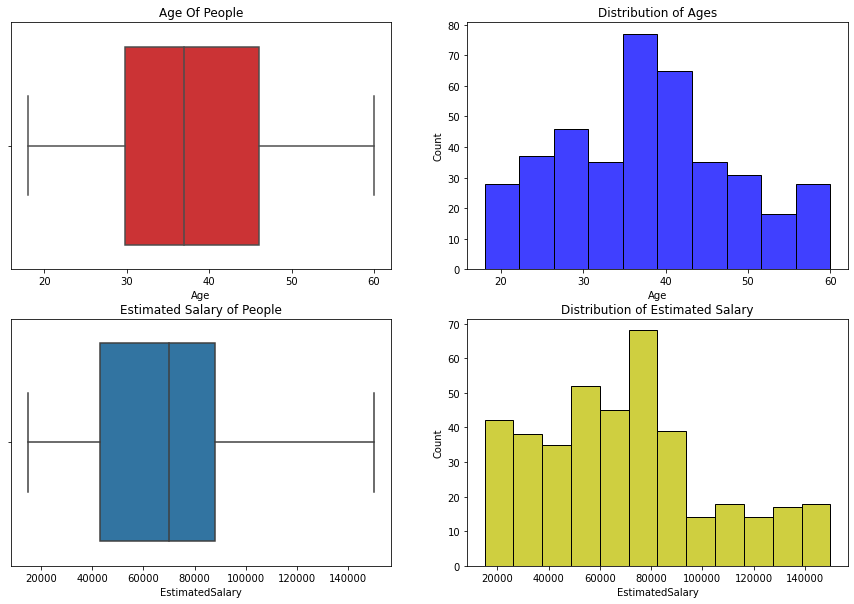

In [6]:
fig,axes = plt.subplots(2,2,figsize =(15,10))
sns.boxplot(ax = axes[0,0],x = df['Age'],palette = "Set1")
axes[0,0].set_title('Age Of People')
sns.histplot(ax = axes[0,1],x = "Age",data = df,color = "b")
axes[0,1].set_title("Distribution of Ages")

sns.boxplot(ax = axes[1,0],x = df['EstimatedSalary'])
axes[1,0].set_title('Estimated Salary of People')
sns.histplot(ax = axes[1,1],x = "EstimatedSalary",data = df,color = "y")
axes[1,1].set_title("Distribution of Estimated Salary")
plt.show()

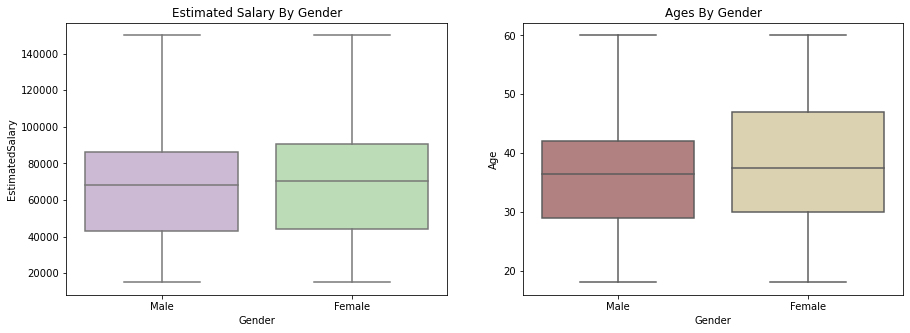

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()


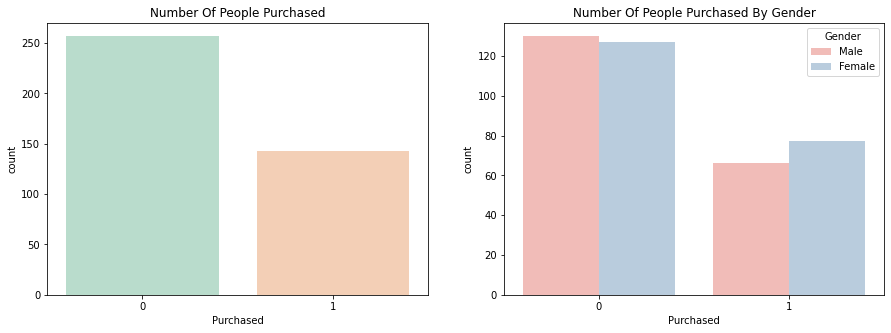

In [8]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df,palette = "Pastel2")
axes[0].set_title('Number Of People Purchased')
sns.countplot(ax = axes[1],x = 'Purchased',hue = 'Gender',data = df,palette = "Pastel1")
axes[1].set_title('Number Of People Purchased By Gender')
plt.show()

In [9]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


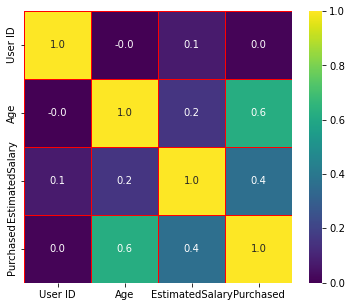

In [10]:
f,ax = plt.subplots(figsize = (6,5))
sns.heatmap(df.corr(),annot = True,linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

In [11]:
df.drop('User ID',axis = 1, inplace = True)
label = {'Male': 0 ,"Female" : 1}
df['Gender'].replace(label, inplace= True)

In [12]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [14]:
X = df.drop(['Purchased'],axis = 1)
X.head

<bound method NDFrame.head of      Gender  Age  EstimatedSalary
0         0   19            19000
1         0   35            20000
2         1   26            43000
3         1   27            57000
4         0   19            76000
..      ...  ...              ...
395       1   46            41000
396       0   51            23000
397       1   50            20000
398       0   36            33000
399       1   49            36000

[400 rows x 3 columns]>

In [16]:
Y = df['Purchased']
Y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64>

In [17]:
print(X.shape)
print(Y.shape)

(400, 3)
(400,)


In [41]:
scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()


,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [43]:
X_train,X_test,y_train,y_test = train_test_split(d_scaled,Y,test_size=0.20,random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1,max_iter = 500)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [45]:
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.8625
Train accuracy: 0.8125


In [46]:
from sklearn.metrics import confusion_matrix


In [50]:
data = pd.DataFrame(confusion_matrix(y_test,y_pred),columns = ['Predicted Positive','Predicted Negative'],index = ['Actual Positive','Actual Negative'])

In [51]:
data

,Predicted Positive,Predicted Negative
Actual Positive,50,2
Actual Negative,9,19
